In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split, cross_val_score, KFold,\
                                    GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
                            classification_report, cohen_kappa_score,\
                            accuracy_score, make_scorer, f1_score

In [2]:
df = pd.DataFrame(loadarff('dados/phpokU53r.arff')[0])

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,b'1'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'1'
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,b'1'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'1'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'1'


In [4]:
df.Class = df.Class.astype(str)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [6]:
diag = {'1':'Disk Hernia', '2':'Spondylolisthesis', '3':'Normal'}

df['Diag'] = [diag[Class] for Class in df.Class]

df.drop('Class', axis=1, inplace=True)

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,Diag
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


In [8]:
df.groupby('Diag').mean()

,V1,V2,V3,V4,V5,V6
Diag,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687
Spondylolisthesis,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572


In [9]:
df.groupby('Diag').describe().T

Diag      Disk Hernia      Normal  Spondylolisthesis
V1 count    60.000000  150.000000         100.000000
   mean     47.638407   71.514224          51.685244
   std      10.697131   15.109337          12.368161
   min      26.147921   37.903910          30.741938
   25%      41.018099   60.658136          42.817849
   50%      46.416169   72.149306          50.123115
   75%      53.922329   81.075893          61.470097
   max      74.433593  129.834041          89.834676
V2 count    60.000000  150.000000         100.000000
   mean     17.398795   20.748038          12.821414
   std       7.016708   11.506169           6.778503
   min       3.144669   -6.554948          -5.845994
   25%      12.874329   13.461149           8.799951
   50%      16.949285   19.309548          13.482435
   75%      22.002981   29.229680          16.785953
   max      41.557331   49.431864          29.894119
V3 count    60.000000  150.000000         100.000000
   mean     35.463524   64.110108          43.542605
   std       9.767795   16.397068          12.361388
   min      14.000000   24.710274          19.071075
   25%      29.038069   52.000000          35.000000
   50%      35.164873   62.555200          42.638923
   75%      42.011563   76.990924          51.602345
   max      62.275275  125.742386          90.563461
V4 count    60.000000  150.000000         100.000000
   mean     30.239612   50.766186          38.863830
   std       7.555388   12.318813           9.624004
   min      13.366931   19.290046          17.386972
   25%      25.215274   43.166815          32.340486
   50%      30.000659   50.751695          37.059694
   75%      34.962103   56.675435          44.608788
   max      46.613539  121.429566          67.195460
V5 count    60.000000  150.000000         100.000000
   mean    116.474968  114.518810         123.890834
   std       9.355720   15.579995           9.014246
   min      84.241415   70.082575         100.501192
   25%     112.280320  104.706761         118.182659
   50%     116.696146  114.842400         123.874329
   75%     122.042999  123.337307         129.040402
   max     137.540613  163.071041         147.894637
V6 count    60.000000  150.000000         100.000000
   mean      2.480251   51.896687           2.186572
   std       5.531177   40.108030           6.307483
   min     -10.675871    1.010041         -11.058179
   25%      -0.910818   30.393271          -1.511360
   50%       2.542441   42.372509           1.152710
   75%       6.059666   61.894425           4.968807
   max      15.779697  418.543082          31.172767

In [10]:
df.drop(df[df.V6 > 400].index, inplace=True)

In [11]:
X = df.drop('Diag', axis=1)
y = df.Diag

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

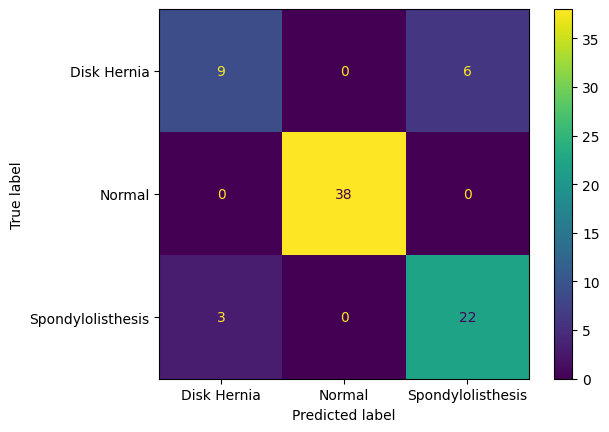

In [14]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                       display_labels=df.Diag.unique().tolist()).plot()
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

      Disk Hernia       0.75      0.60      0.67        15
           Normal       1.00      1.00      1.00        38
Spondylolisthesis       0.79      0.88      0.83        25

         accuracy                           0.88        78
        macro avg       0.85      0.83      0.83        78
     weighted avg       0.88      0.88      0.88        78



In [16]:
print(accuracy_score(y_test, y_pred))

0.8846153846153846


In [17]:
kfold = KFold(n_splits=5, shuffle=True)
result = cross_val_score(knn, X, y, cv=kfold)

In [18]:
print('K-Fold r^2 Scores:', result)
print('Mean r^2 for cross-validation K-Fold:', result.mean())

K-Fold r^2 Scores: [0.80645161 0.79032258 0.80645161 0.77419355 0.7704918 ]
Mean r^2 for cross-validation K-Fold: 0.7895822316234797


In [19]:
error = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

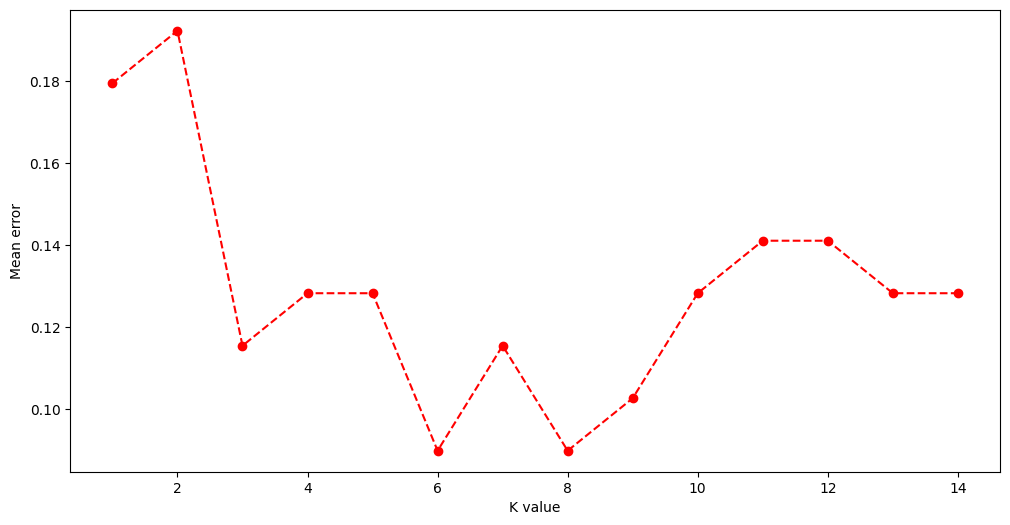

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='r', linestyle='--', marker='o',
         markersize=6)
plt.ylabel('Mean error')
plt.xlabel('K value')
plt.show()

In [21]:
param_grid = {'n_neighbors': [3, 7, 9],
              'metric': ['minkowski', 'euclidean', 'manhattan']}

scoring = make_scorer(accuracy_score, greater_is_better=True)

gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                  scoring=scoring, cv=5, n_jobs=5, verbose=3)

gs.fit(X_train, y_train)

knn_params = gs.best_params_
print('KNN:', knn_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
KNN: {'metric': 'manhattan', 'n_neighbors': 7}


In [22]:
print(gs.cv_results_)

{'mean_fit_time': array([0.00117474, 0.00074139, 0.00080533, 0.00074339, 0.00063963,
       0.00067239, 0.00092978, 0.0007431 , 0.00065451]), 'std_fit_time': array([8.36382978e-05, 4.76046383e-05, 2.16552612e-04, 6.76105656e-05,
       2.14721843e-05, 9.96008160e-05, 4.10799056e-04, 2.68621396e-04,
       5.41239372e-05]), 'mean_score_time': array([0.00176878, 0.00160322, 0.00159984, 0.00152693, 0.00179272,
       0.00147262, 0.00186024, 0.00179038, 0.00147696]), 'std_score_time': array([7.73347552e-05, 5.84841503e-05, 1.13218293e-04, 5.68320283e-05,
       7.16669773e-04, 8.88145017e-05, 8.02970394e-04, 7.19092641e-04,
       6.60002573e-05]), 'param_metric': masked_array(data=['minkowski', 'minkowski', 'minkowski', 'euclidean',
                   'euclidean', 'euclidean', 'manhattan', 'manhattan',
                   'manhattan'],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=np.str_('?'),
            dtype=obje

In [23]:
def apply_cross_validation(X, y):
    kfold = KFold(n_splits=10, shuffle=True)

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X, y)

    # SVM
    svm = SVC()
    svm.fit(X, y)

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X, y)

    # KFold
    knn_res = cross_val_score(knn, X, y, cv=kfold)
    svm_res = cross_val_score(svm, X, y, cv=kfold)
    rf_res = cross_val_score(rf, X, y, cv=kfold)

    # Results
    res = {
        'KNN': knn_res.mean(),
        'SVM': svm_res.mean(),
        'RF': rf_res.mean()
    }

    # Best
    best = max(res, key=res.get)

    print(f'KNN (r^2): {res["KNN"]}')
    print(f'SVM (r^2): {res["SVM"]}')
    print(f'RF (r^2): {res["RF"]}')
    print()
    print(f'Best: {best}, Value: {res[best]}')

In [24]:
apply_cross_validation(X, y)

KNN (r^2): 0.8287096774193549
SVM (r^2): 0.86752688172043
RF (r^2): 0.8477419354838709

Best: SVM, Value: 0.86752688172043
